In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle

In [ ]:
df = pd.read_csv('/content/dataset.txt')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
#EDA - exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [ ]:
#check null value 
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#to check unique car names
df['car name'].unique()

array(['chevrolet chevelle malibu ', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom',
       'chevrolet chevelle malibu', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'me

In [ ]:
#drop column name car name we dont need
df.drop(['car name'], axis=1,inplace=True)

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [ ]:
#split data into train and test set
X = df.drop('mpg', axis=1)

In [ ]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [ ]:
Y = df['mpg']

In [ ]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=101)


In [ ]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
57,4,113.0,95,2278,15.5,72,3
389,6,232.0,112,2835,14.7,82,1
320,4,119.0,92,2434,15.0,80,3
357,4,119.0,100,2615,14.8,81,3
160,6,231.0,110,3907,21.0,75,1
...,...,...,...,...,...,...,...
63,8,400.0,175,4385,12.0,72,1
326,4,90.0,48,2335,23.7,80,2
337,4,107.0,72,2290,17.0,80,3
11,8,340.0,160,3609,8.0,70,1


In [ ]:
#normalize the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()


In [ ]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
X_train_std

array([[-0.84750898, -0.7596462 , -0.19766728, ..., -0.01041762,
        -1.09361765,  1.75840623],
       [ 0.32938122,  0.38501828,  0.21748008, ..., -0.29848748,
         1.58153937, -0.7323429 ],
       [-0.84750898, -0.70193203, -0.27092857, ..., -0.19046128,
         1.04650796,  1.75840623],
       ...,
       [-0.84750898, -0.81736038, -0.75933722, ...,  0.52971336,
         1.04650796,  1.75840623],
       [ 1.50627142,  1.42387345,  1.38966084, ..., -2.71107251,
        -1.62864905, -0.7323429 ],
       [-0.84750898, -0.90393164, -0.93028025, ...,  0.2416435 ,
         1.31402367, -0.7323429 ]])

In [ ]:
X_test_std

array([[-0.84750898, -0.67307494, -0.56397376, -0.60901176,  0.3496697 ,
        -0.55858624, -0.7323429 ],
       [ 0.32938122,  0.63511305, -0.19766728,  0.26657229,  0.81778321,
        -0.02355484, -0.7323429 ],
       [-0.84750898, -1.01935999, -0.93028025, -1.01140281,  0.85379194,
         1.04650796,  1.75840623],
       [ 1.50627142,  2.00101521,  1.56060387,  2.28796781, -1.09067958,
        -0.82610195, -0.7323429 ],
       [ 1.50627142,  2.00101521,  1.14545652,  1.76639348, -1.27072324,
        -0.82610195, -0.7323429 ],
       [-0.84750898, -0.68269397,  0.16863921, -0.43318693, -0.98265338,
         0.24396086,  0.51303166],
       [-0.84750898, -0.91355067, -1.24774588, -0.98780216,  3.26637698,
         1.58153937,  0.51303166],
       [-0.84750898, -0.39412309, -0.4418716 , -0.13227866,  0.74576575,
         0.51147656, -0.7323429 ],
       [-0.84750898, -0.91355067, -1.39426847, -1.33591172,  1.79001897,
        -1.62864905,  0.51303166],
       [-0.84750898, -0.4999

In [ ]:
#tells total number of columns in x_train
len(X_train.keys())

7

In [ ]:
#it displays columns headings
X_train.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=64,activation='relu',input_shape=[7]))

model.add(Dense(units=128,activation='relu'))

model.add(Dense(units=256,activation='relu'))

model.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mean_squared_error','mean_absolute_error'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 42,113
Trainable params: 42,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
model.fit(X_train_std,Y_train,batch_size=100, epochs=500)

Epoch 1/500
4/4 [==============================] - 1s 4ms/step - loss: 613.8645 - mean_squared_error: 613.8645 - mean_absolute_error: 23.5308
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 584.6386 - mean_squared_error: 584.6386 - mean_absolute_error: 22.8227
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 537.6510 - mean_squared_error: 537.6510 - mean_absolute_error: 21.8241
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 489.4398 - mean_squared_error: 489.4398 - mean_absolute_error: 20.6498
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 412.6359 - mean_squared_error: 412.6359 - mean_absolute_error: 18.6671
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 333.3755 - mean_squared_error: 333.3755 - mean_absolute_error: 16.2771
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 197.9155 - mean_squared_error: 197.9155 - mean_absolute_error: 11.9595
Epoch 

In [ ]:
model.evaluate(X_train_std,Y_train)

10/10 [==============================] - 0s 2ms/step - loss: 1.7453 - mean_squared_error: 1.7453 - mean_absolute_error: 0.9465


[1.7453252077102661, 1.7453252077102661, 0.9465107321739197]

In [ ]:
model.evaluate(X_test_std,Y_test)

3/3 [==============================] - 0s 2ms/step - loss: 6.1147 - mean_squared_error: 6.1147 - mean_absolute_error: 1.7917


[6.114683151245117, 6.114683151245117, 1.7917312383651733]

In [ ]:
prediction = model.predict(X_test_std)

In [ ]:
prediction

array([[23.300379 ],
       [19.333008 ],
       [35.327976 ],
       [12.904253 ],
       [13.905024 ],
       [26.152311 ],
       [46.66689  ],
       [21.749313 ],
       [26.412437 ],
       [22.251177 ],
       [20.970325 ],
       [22.604094 ],
       [33.427837 ],
       [31.650175 ],
       [16.666935 ],
       [15.344705 ],
       [16.054626 ],
       [18.027798 ],
       [23.45818  ],
       [25.482786 ],
       [13.293466 ],
       [23.214151 ],
       [28.523409 ],
       [17.8494   ],
       [15.617348 ],
       [34.03107  ],
       [26.393486 ],
       [29.241287 ],
       [16.462383 ],
       [14.124417 ],
       [18.291061 ],
       [34.240284 ],
       [24.454853 ],
       [26.384216 ],
       [18.656385 ],
       [14.13072  ],
       [26.527367 ],
       [33.5843   ],
       [15.483225 ],
       [20.188055 ],
       [34.788467 ],
       [15.656975 ],
       [25.939943 ],
       [16.129654 ],
       [18.70318  ],
       [16.753738 ],
       [28.254023 ],
       [21.57

In [ ]:
Y_test

130    26.0
202    17.5
322    46.6
104    12.0
91     13.0
       ... 
138    14.0
171    24.0
157    15.0
17     21.0
225    17.5
Name: mpg, Length: 80, dtype: float64

In [ ]:
#it tells us the difference btwn Actual data and predicted data
#r2_score tells how much good our model is in percentage
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(Y_test,prediction))

In [ ]:
rmse

2.472789662466125

In [ ]:
print(r2_score(Y_test,prediction))

0.8943444605470546


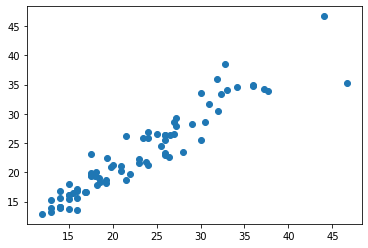

In [ ]:
plt.scatter(Y_test,prediction)
plt.show()

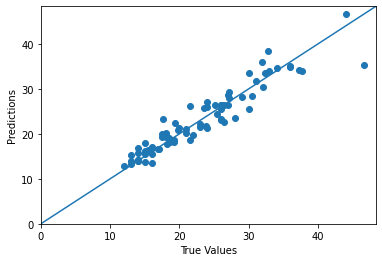

In [ ]:
plt.scatter(Y_test,prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100,100],[-100,100])

In [ ]:
#prediction on single value
list1=[[8,350,165,3693,11.5,70,1]]
list1=sc.transform(list1)
list1

array([[ 1.50627142,  1.52006374,  1.51176301,  0.85658849, -1.4507669 ,
        -1.62864905, -0.7323429 ]])

In [ ]:
pred=model.predict(list1)
pred

array([[15.466703]], dtype=float32)

In [ ]:
#prediction on single value
list2=[[8,302,140,3449,10.5,70,1]]
list2=sc.transform(list2)
list2

array([[ 1.50627142,  1.05835034,  0.90125219,  0.56866059, -1.81085421,
        -1.62864905, -0.7323429 ]])

In [ ]:
pred2=model.predict(list2)
pred2

array([[16.669931]], dtype=float32)

In [ ]:
model.save('my_model.h5')